GOALS: 
1. Analyze popularity of artists based on centralities
2. Find communities of similar artists that co-occur across playlists using Girvan-Newman and/or Louvain

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

## Sample Comparison

In [34]:
g = nx.read_graphml("graphs/artists_graph_connected_30.graphml")
g
print(g)
print("Number of connected Components:",nx.number_connected_components(g))
print("Diameter:",nx.diameter(g))

Graph with 743 nodes and 23508 edges
Number of connected Components: 1
Diameter: 5


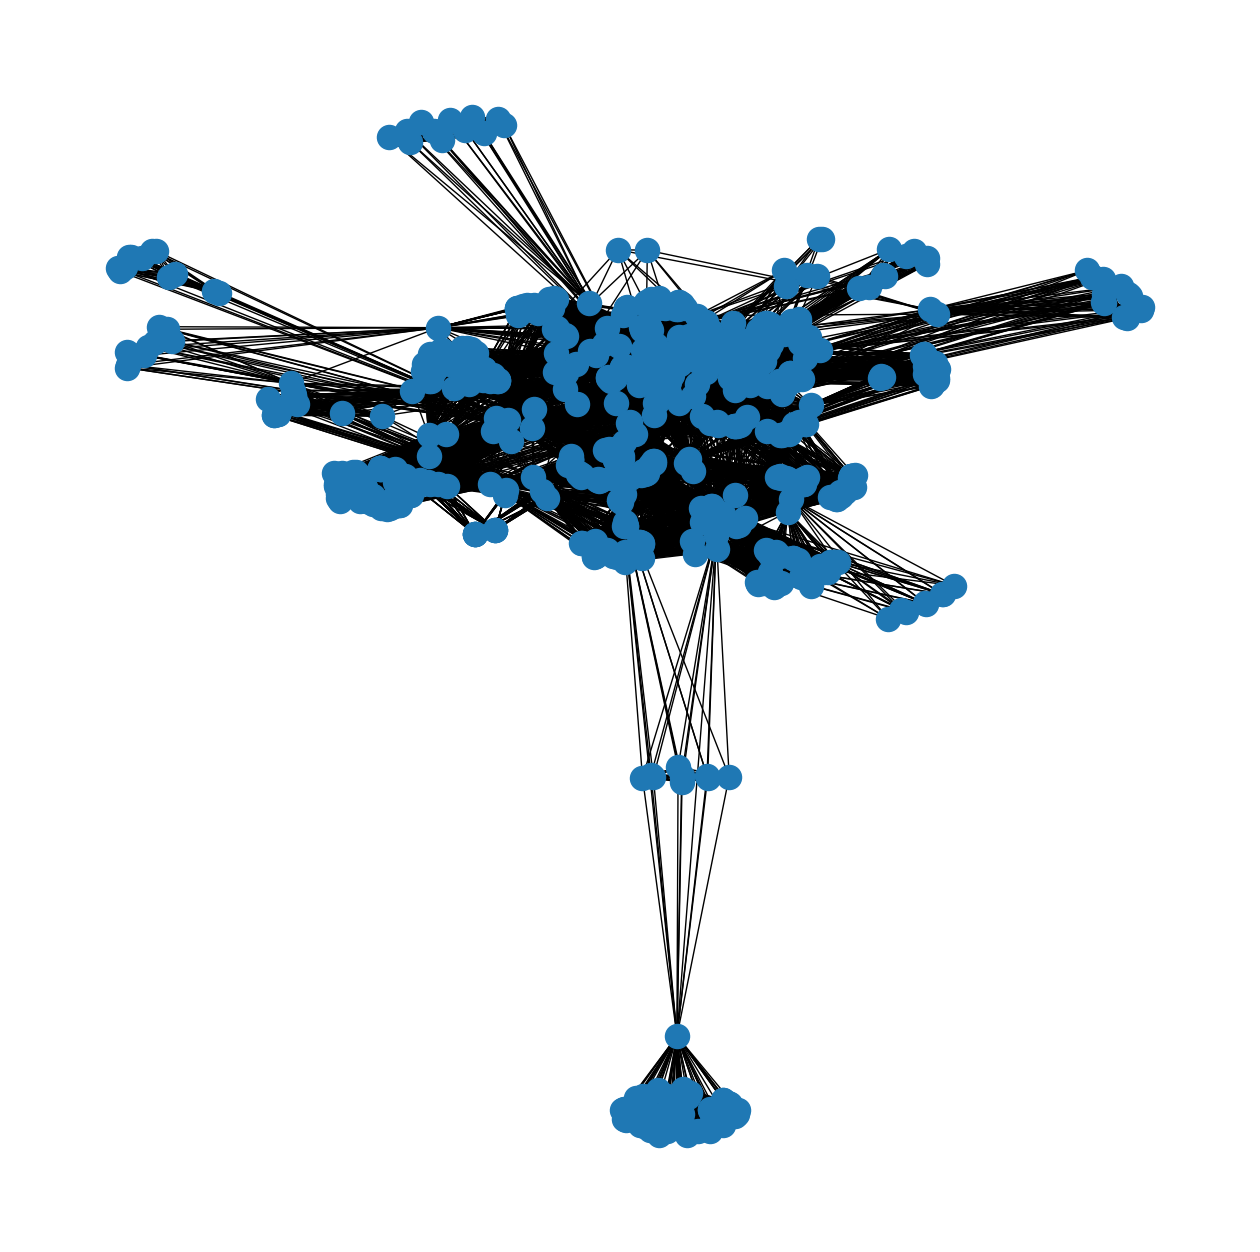

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(16,16))
nx.draw_networkx(g, ax=ax, with_labels=False)
plt.axis("off")
plt.show()

Graph with 1860 nodes and 82404 edges


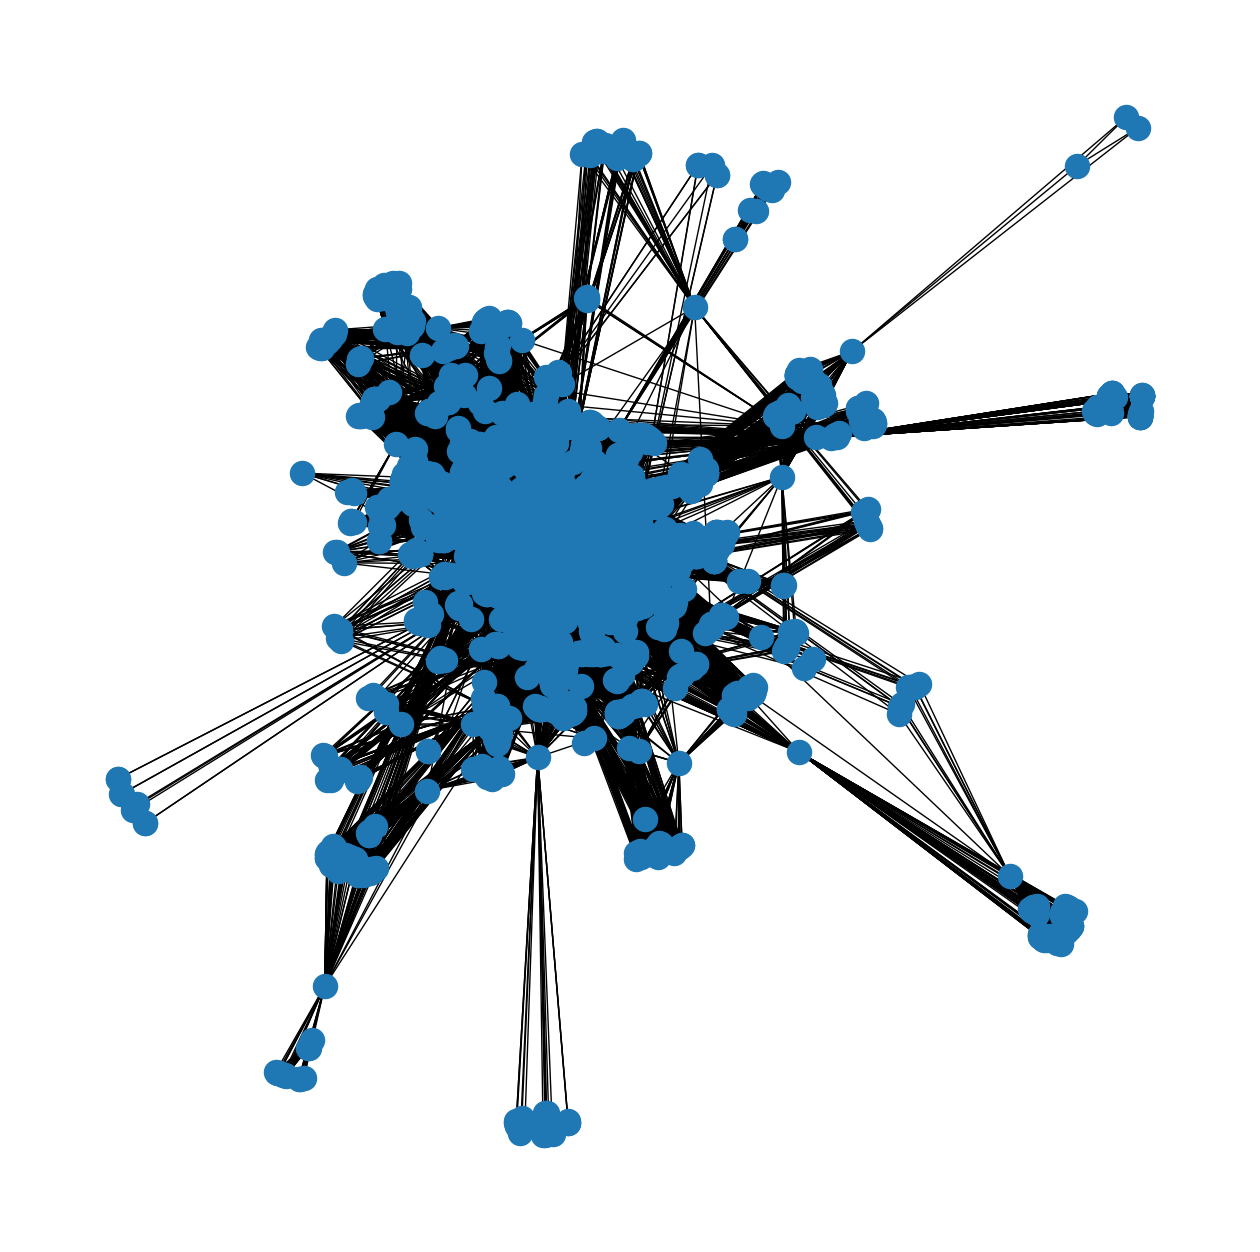

In [4]:
g100 = nx.read_graphml("graphs/artists_graph_connected_100.graphml")
print(g100)
fig, ax = plt.subplots(1, 1, figsize=(16,16))
nx.draw_networkx(g100, ax=ax, with_labels=False)
plt.axis("off")
plt.show()

In [6]:
g = nx.read_graphml("graphs/artists_graph_connected_30.graphml")

degree_centrality = nx.degree_centrality(g)
betweenness_centrality = nx.betweenness_centrality(g)
closeness_centrality = nx.closeness_centrality(g)
eigenvector_centrality = nx.eigenvector_centrality(g)

average_degree_centrality = np.mean(list(degree_centrality.values()))
average_betweenness_centrality = np.mean(list(betweenness_centrality.values()))
average_closeness_centrality = np.mean(list(closeness_centrality.values()))
average_eigenvector_centrality = np.mean(list(eigenvector_centrality.values()))

print(f"Average Degree Centrality: {average_degree_centrality:.4f}")
print(f"Average Betweenness Centrality: {average_betweenness_centrality:.4f}")
print(f"Average Closeness Centrality: {average_closeness_centrality:.4f}")
print(f"Average Eigenvector Centrality: {average_eigenvector_centrality:.4f}")

Average Degree Centrality: 0.0853
Average Betweenness Centrality: 0.0020
Average Closeness Centrality: 0.4150
Average Eigenvector Centrality: 0.0165


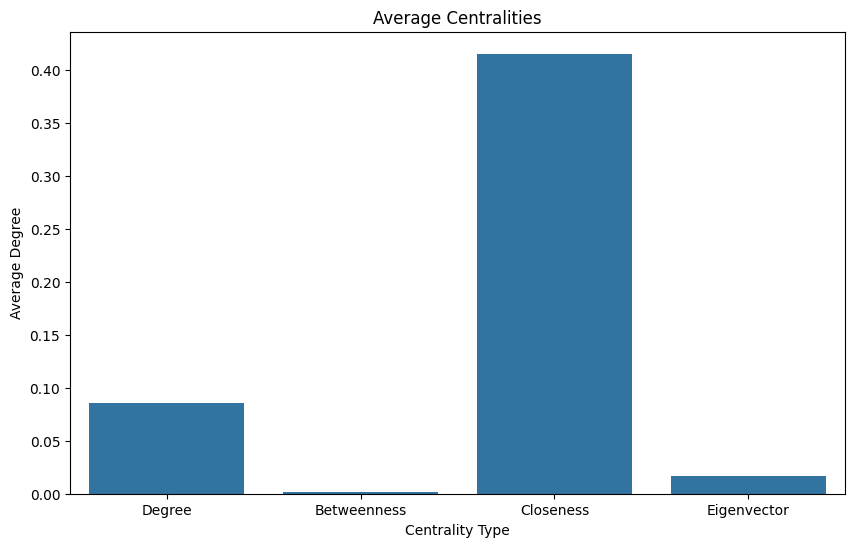

In [ ]:
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Centrality', y='Average Value', data=centralities_df)
# plt.xlabel("Centrality Type")
# plt.ylabel("Average Centrality")
# plt.title("Average Centralities for sample size 30")
# plt.show()

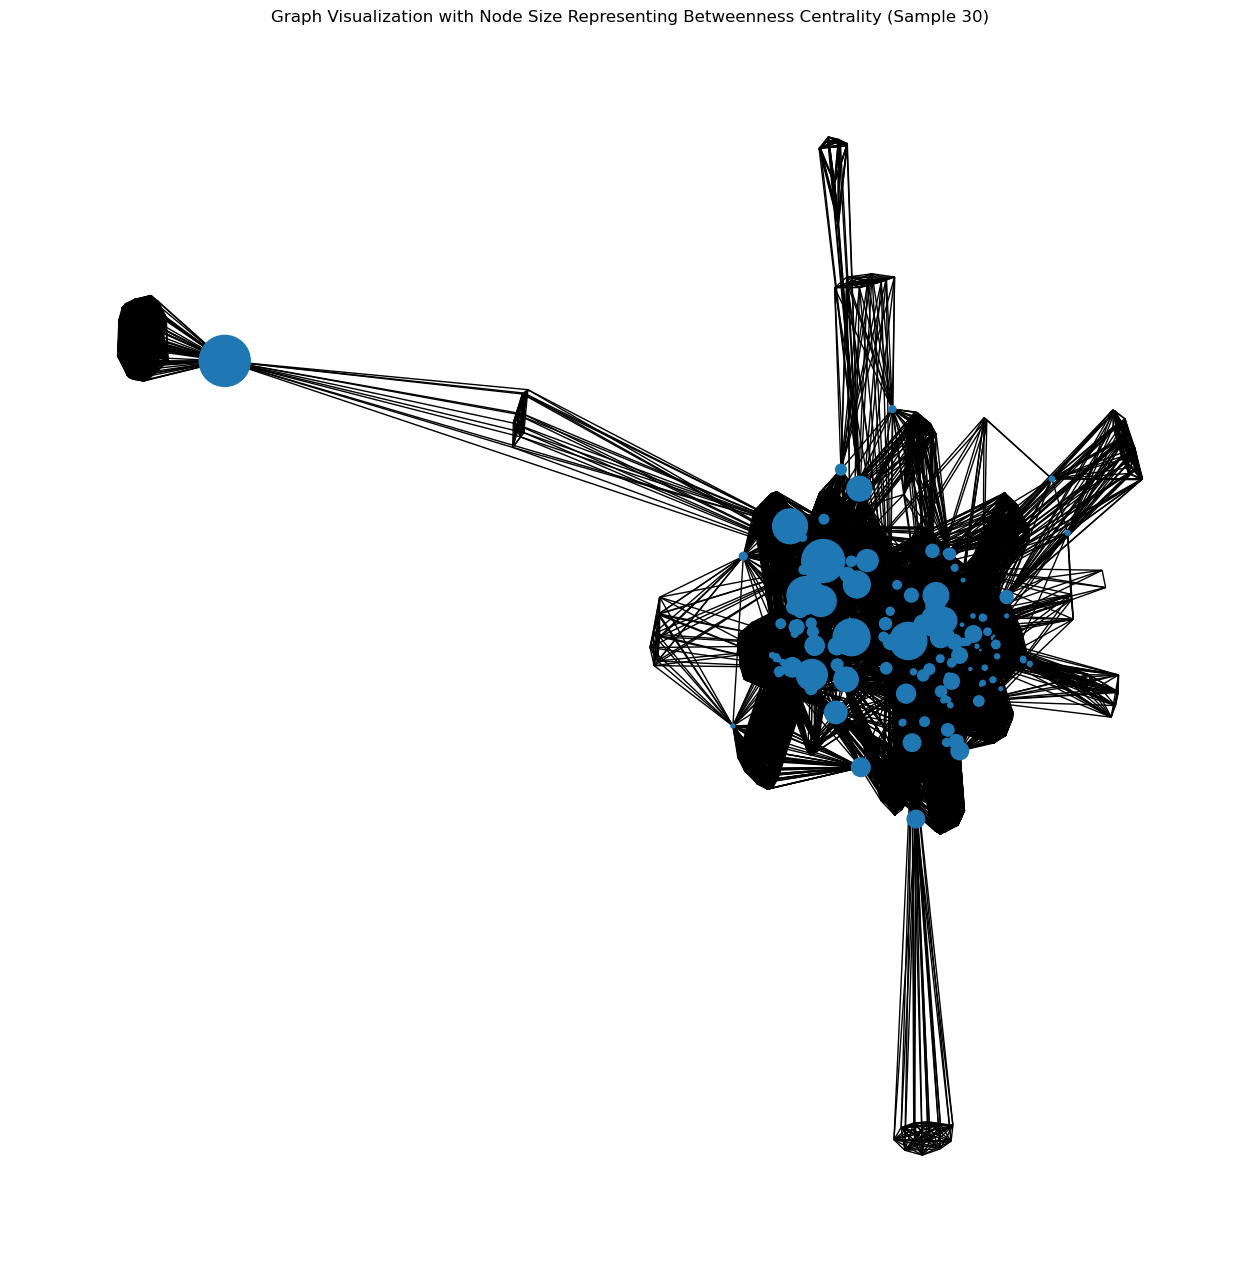

In [7]:
# Low betweeness, probably because of large data size and high closness/transience
fig, ax = plt.subplots(1, 1, figsize=(16,16))
node_size = [v * 10000 for v in betweenness_centrality.values()]
nx.draw_networkx(g, ax=ax, node_size=node_size, with_labels=False)
plt.axis("off")
plt.title("Graph Visualization with Node Size Representing Betweenness Centrality (Sample 30)")
plt.show()

In [8]:
g100 = nx.read_graphml("graphs/artists_graph_connected_100.graphml")

degree_centrality = nx.degree_centrality(g100)
betweenness_centrality = nx.betweenness_centrality(g100)
closeness_centrality = nx.closeness_centrality(g100)
eigenvector_centrality = nx.eigenvector_centrality(g100)

average_degree_centrality = np.mean(list(degree_centrality.values()))
average_betweenness_centrality = np.mean(list(betweenness_centrality.values()))
average_closeness_centrality = np.mean(list(closeness_centrality.values()))
average_eigenvector_centrality = np.mean(list(eigenvector_centrality.values()))

print(f"Average Degree Centrality: {average_degree_centrality:.4f}")
print(f"Average Betweenness Centrality: {average_betweenness_centrality:.4f}")
print(f"Average Closeness Centrality: {average_closeness_centrality:.4f}")
print(f"Average Eigenvector Centrality: {average_eigenvector_centrality:.4f}")

Average Degree Centrality: 0.0477
Average Betweenness Centrality: 0.0008
Average Closeness Centrality: 0.4115
Average Eigenvector Centrality: 0.0134


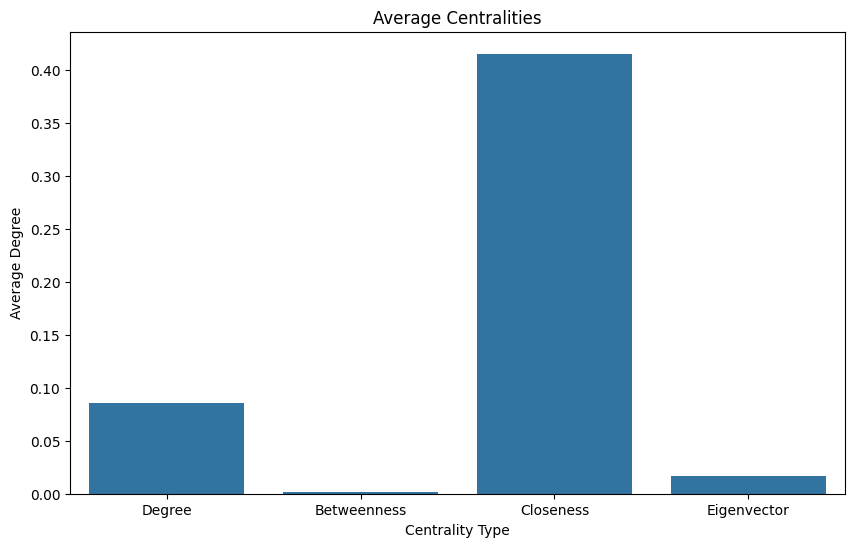

In [ ]:
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Centrality', y='Average Value', data=centralities_df)
# plt.xlabel("Centrality Type")
# plt.ylabel("Average Centrality")
# plt.title("Average Centralities for sample size 100")
# plt.show()

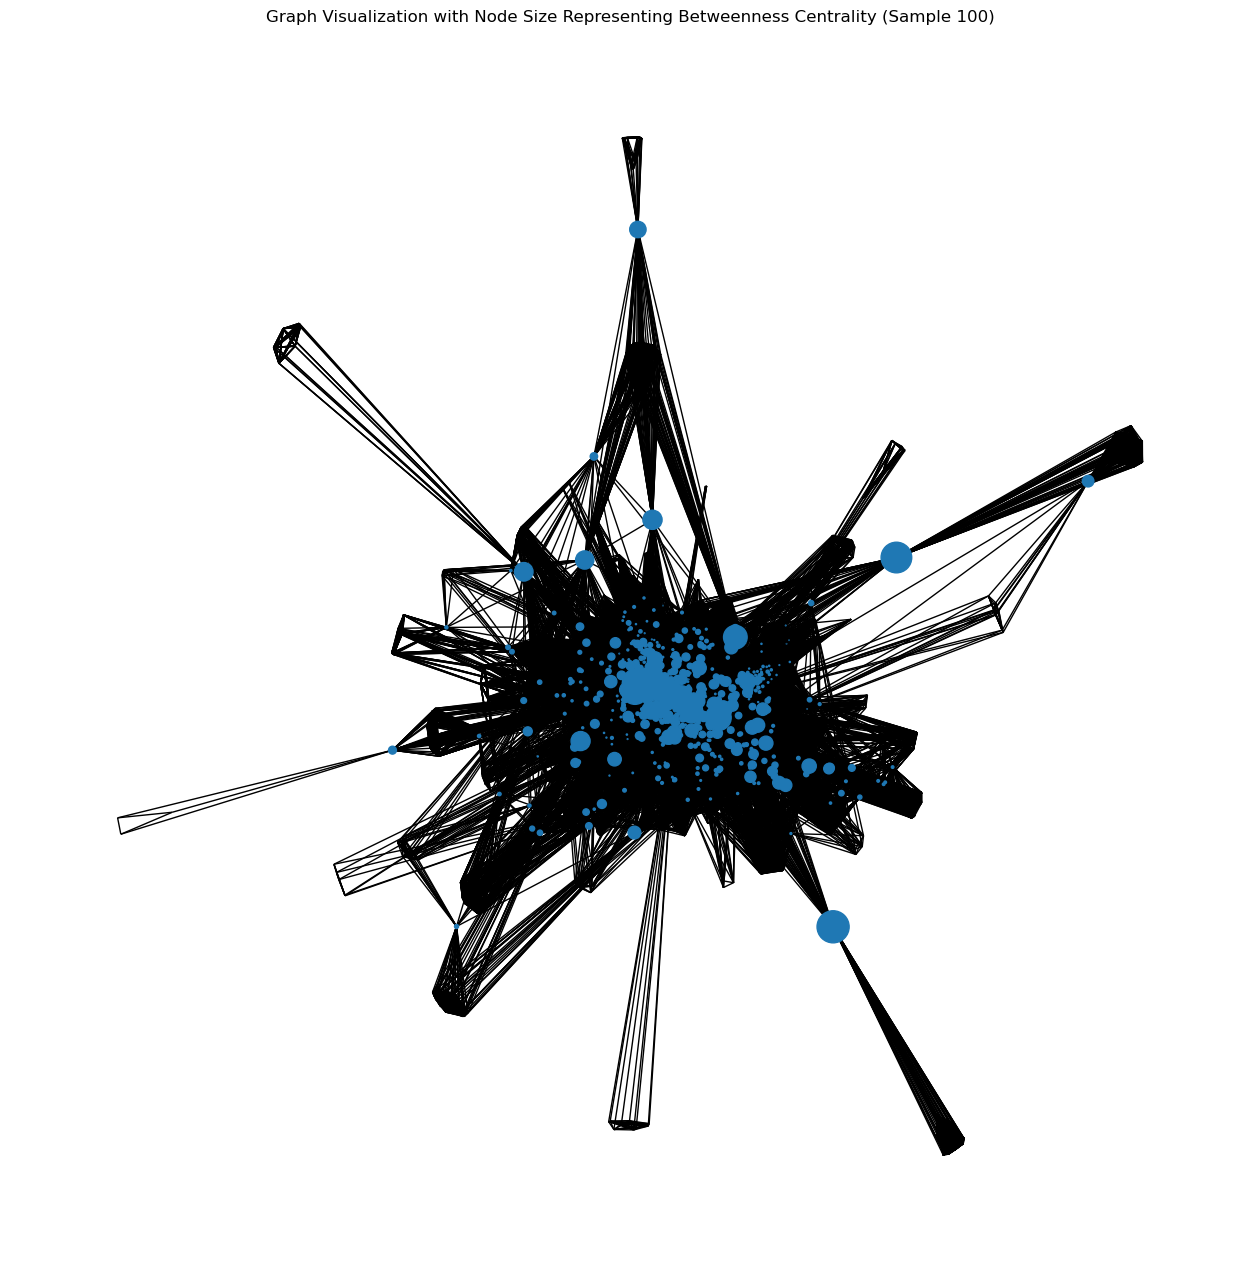

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(16,16))
node_size = [v * 10000 for v in betweenness_centrality.values()]
nx.draw_networkx(g100, ax=ax, node_size=node_size, with_labels=False)
plt.axis("off")
plt.title("Graph Visualization with Node Size Representing Betweenness Centrality (Sample 100)")
plt.show()

Comparing the two sample sizes, the 30 one is more manageable to work with, since the 100 one takes alot longer to load and perform calculations on. The averages and distribution of centralities of the 30 is similar to the 100, so we can assume that the 30 sample still accurately reflects the original data set.

In [10]:
degree_centrality = nx.degree_centrality(g)
degree_centrality

{'AC/DC': 0.0876010781671159,
 'Billy Joel': 0.192722371967655,
 "Guns N' Roses": 0.0876010781671159,
 'Disturbed': 0.0876010781671159,
 'Van Halen': 0.0876010781671159,
 'The Beatles': 0.10242587601078168,
 'Eminem': 0.30188679245283023,
 'Queen': 0.0876010781671159,
 'Lynyrd Skynyrd': 0.28706199460916443,
 'Beastie Boys': 0.0876010781671159,
 'Wu-Tang Clan': 0.10377358490566038,
 'N.W.A.': 0.16711590296495957,
 'Aerosmith': 0.0876010781671159,
 'Poison': 0.0876010781671159,
 'Mötley Crüe': 0.0876010781671159,
 'Twisted Sister': 0.0876010781671159,
 'Def Leppard': 0.0876010781671159,
 'Run–D.M.C.': 0.0876010781671159,
 'The Beach Boys': 0.22641509433962265,
 'Kansas': 0.0876010781671159,
 'Alice Cooper': 0.0876010781671159,
 'Billy Idol': 0.0876010781671159,
 'Cheap Trick': 0.0876010781671159,
 'Creedence Clearwater Revival': 0.0876010781671159,
 'Misfits': 0.0876010781671159,
 'OutKast': 0.2129380053908356,
 'The Monkees': 0.0876010781671159,
 'America': 0.0876010781671159,
 'Elton J

## Centrality Analysis (Unweighted)

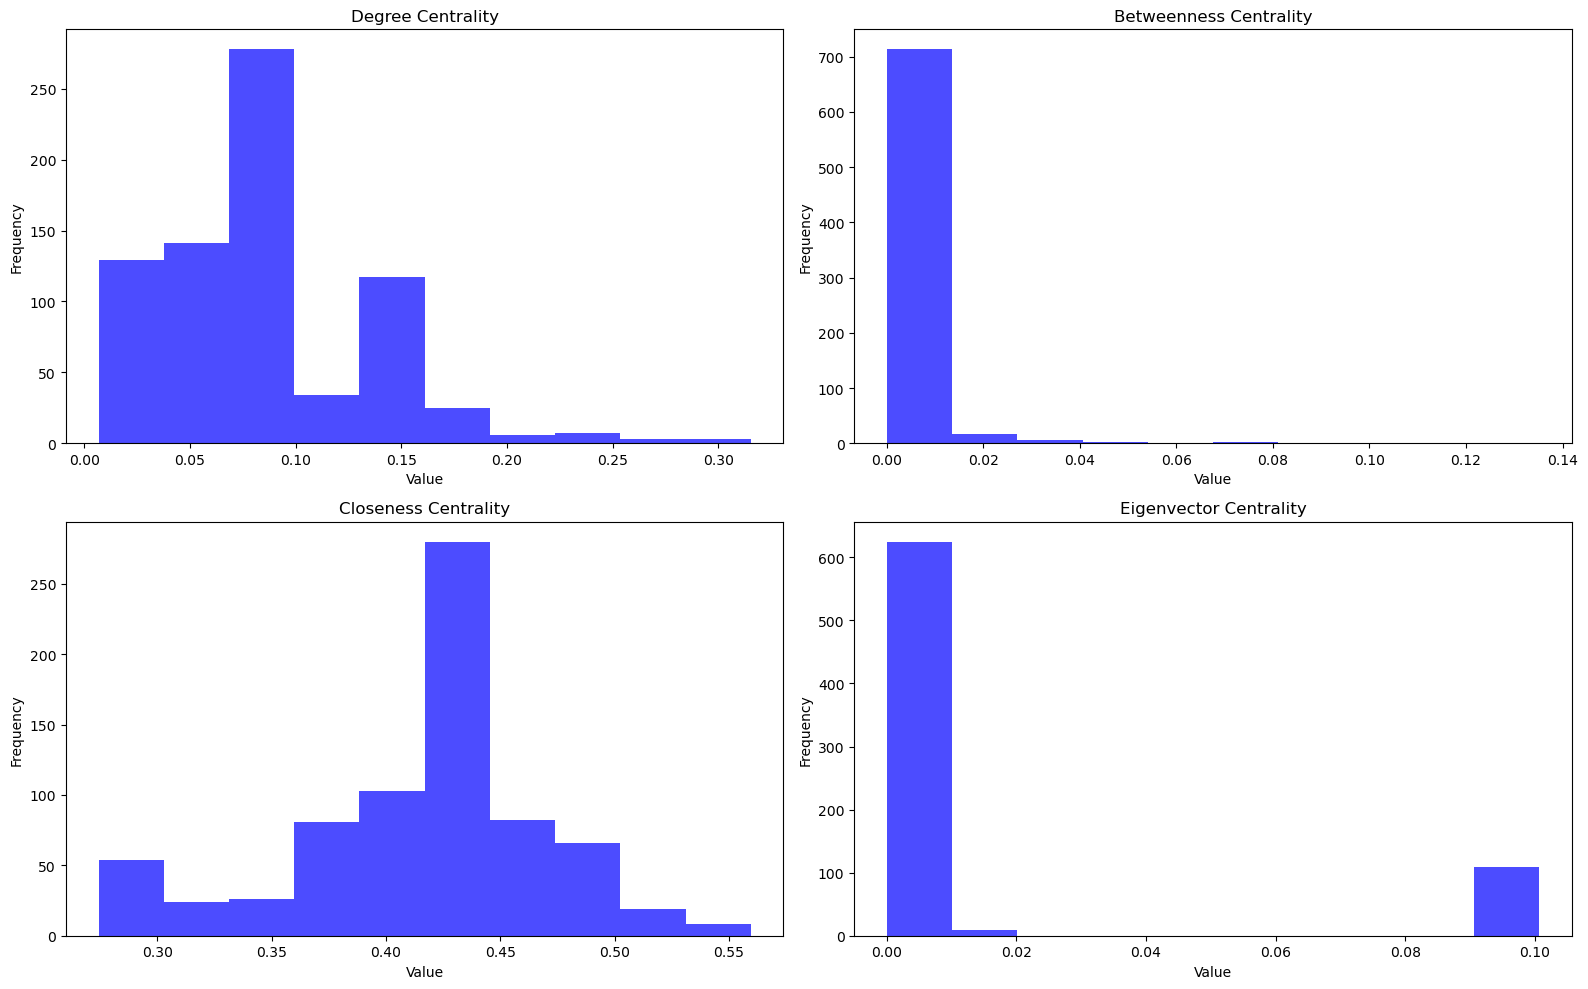

In [11]:
degree_centrality = nx.degree_centrality(g)
betweenness_centrality = nx.betweenness_centrality(g)
closeness_centrality = nx.closeness_centrality(g)
eigenvector_centrality = nx.eigenvector_centrality(g)

centrality_measures = {
    'Degree Centrality': list(degree_centrality.values()),
    'Betweenness Centrality': list(betweenness_centrality.values()),
    'Closeness Centrality': list(closeness_centrality.values()),
    'Eigenvector Centrality': list(eigenvector_centrality.values())
}


plt.figure(figsize=(16, 10))

for i, (title, values) in enumerate(centrality_measures.items(), 1):
    plt.subplot(2, 2, i)
    plt.hist(values, bins=10, alpha=0.7, color='blue')
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

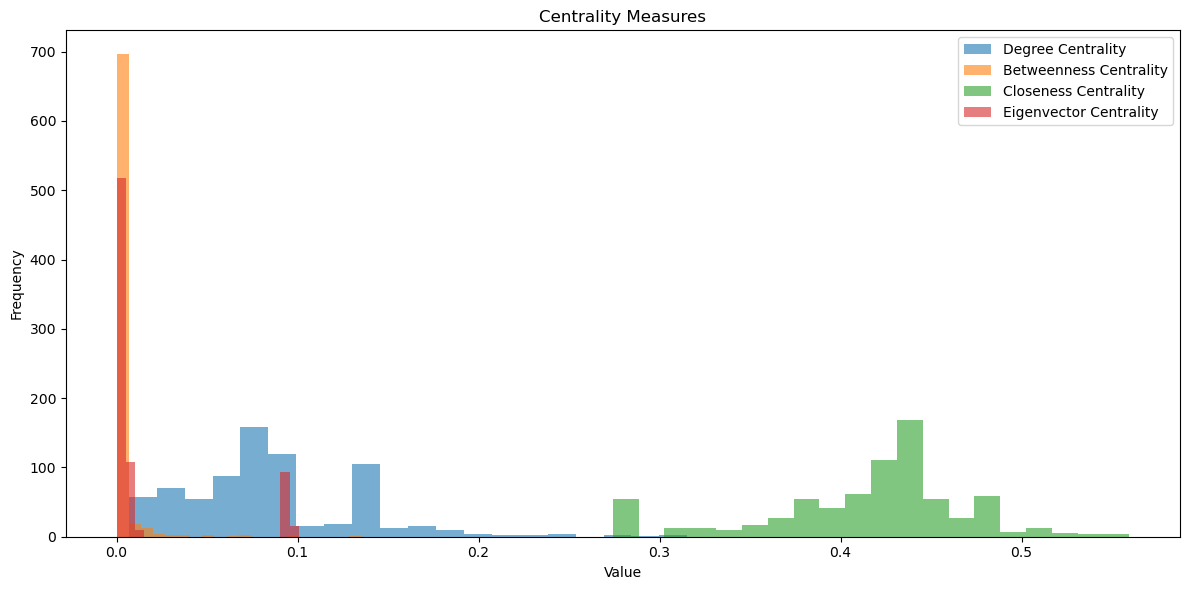

In [12]:
plt.figure(figsize=(12, 6))
for i, (title, values) in enumerate(centrality_measures.items(), 1):
    plt.hist(values, bins=20, alpha=0.6, label=title)

plt.title('Centrality Measures')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

## Centrality Analysis (Weighted)

In [13]:
weighted_degree_centrality = {node: degree for node, degree in g.degree(weight='weight')}
weighted_betweenness_centrality = nx.betweenness_centrality(g, weight='weight')
weighted_closeness_centrality = nx.closeness_centrality(g, distance='weight')
weighted_eigenvector_centrality = nx.eigenvector_centrality(g, weight='weight')

In [15]:
weight_sum = g.size(weight="weight")
weighted_centrality_measures = {
    'Weighted Degree Centrality': [x/weight_sum for x in list(weighted_degree_centrality.values())],
    'Weighted Betweenness Centrality': list(weighted_betweenness_centrality.values()),
    'Weighted Closeness Centrality': list(weighted_closeness_centrality.values()),
    'Weighted Eigenvector Centrality': list(weighted_eigenvector_centrality.values())
}

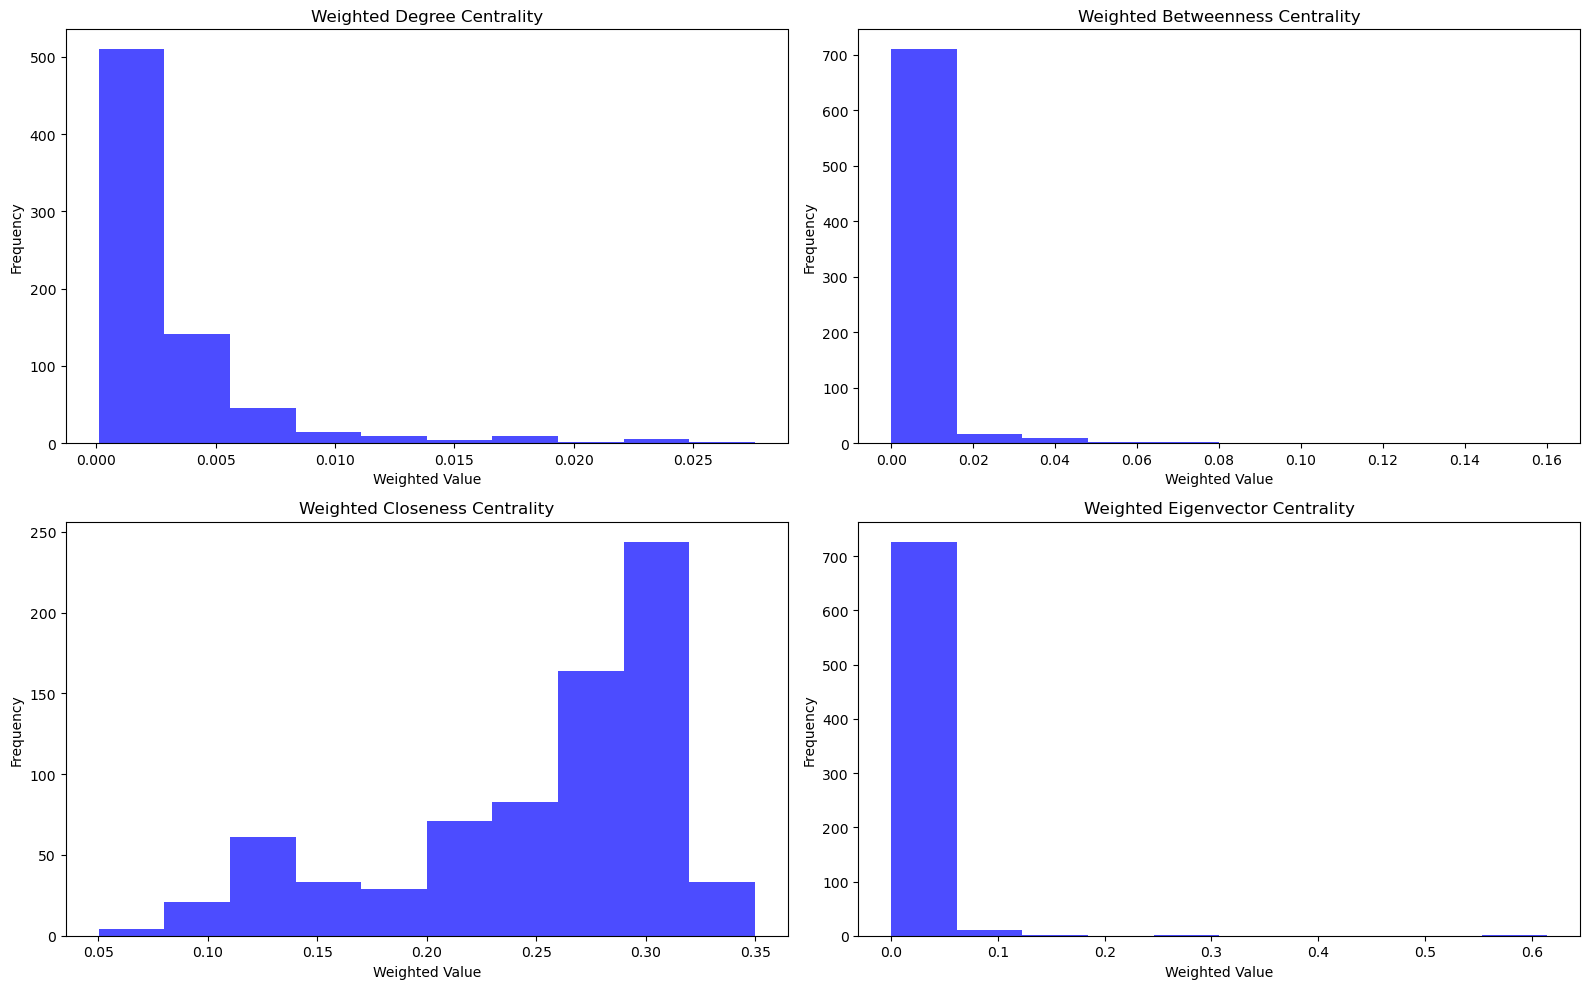

In [16]:
plt.figure(figsize=(16, 10))

for i, (title, values) in enumerate(weighted_centrality_measures.items(), 1):
    plt.subplot(2, 2, i)
    plt.hist(values, bins=10, alpha=0.7, color='blue')
    plt.title(title)
    plt.xlabel('Weighted Value')
    plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

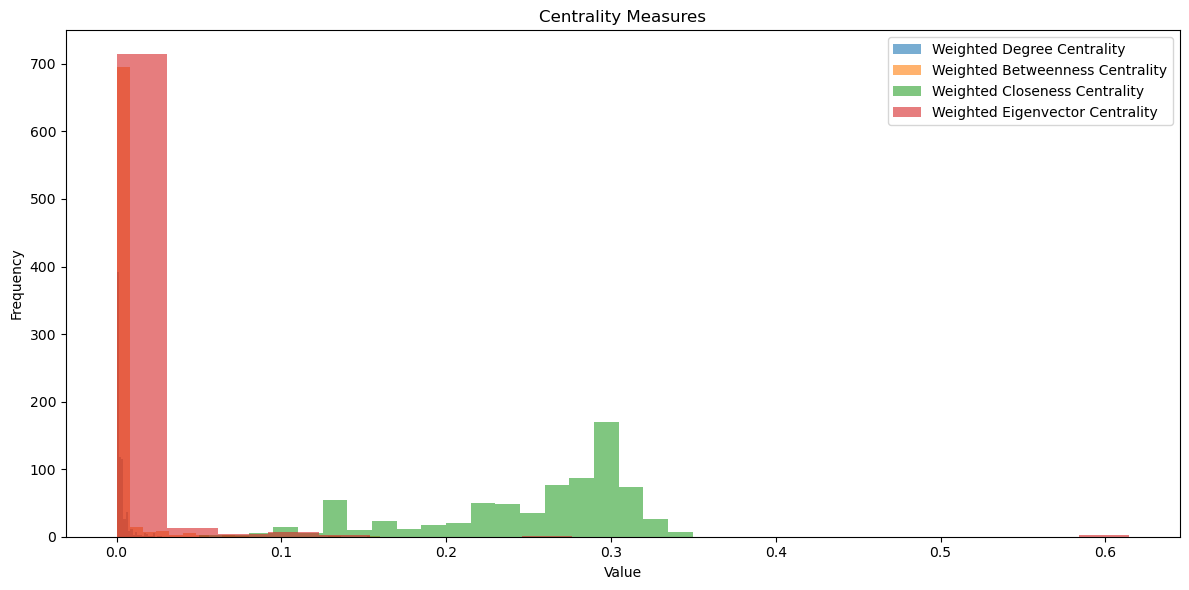

In [23]:
plt.figure(figsize=(12, 6))
for i, (title, values) in enumerate(weighted_centrality_measures.items(), 1):
    plt.hist(values, bins=20, alpha=0.6, label=title)

plt.title('Centrality Measures')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

Since the weighted centralities distributions are significantly more skewed compared to the unweighted distributions, we will continue with the unweighted centralities for analysis. 

## Top Centrality Artists

In [36]:
nx.clustering(g)

{'AC/DC': 1.0,
 'Billy Joel': 0.4134738500935684,
 "Guns N' Roses": 1.0,
 'Disturbed': 1.0,
 'Van Halen': 1.0,
 'The Beatles': 0.7494736842105263,
 'Eminem': 0.27053971812940425,
 'Queen': 1.0,
 'Lynyrd Skynyrd': 0.39582779697050224,
 'Beastie Boys': 1.0,
 'Wu-Tang Clan': 0.7334244702665755,
 'N.W.A.': 0.506556517178075,
 'Aerosmith': 1.0,
 'Poison': 1.0,
 'Mötley Crüe': 1.0,
 'Twisted Sister': 1.0,
 'Def Leppard': 1.0,
 'Run–D.M.C.': 1.0,
 'The Beach Boys': 0.325990875392073,
 'Kansas': 1.0,
 'Alice Cooper': 1.0,
 'Billy Idol': 1.0,
 'Cheap Trick': 1.0,
 'Creedence Clearwater Revival': 1.0,
 'Misfits': 1.0,
 'OutKast': 0.39603321776989436,
 'The Monkees': 1.0,
 'America': 1.0,
 'Elton John': 1.0,
 'Led Zeppelin': 0.4550967741935484,
 'Pearl Jam': 1.0,
 'Danzig': 1.0,
 'Simon & Garfunkel': 1.0,
 'Kid Cudi': 0.47898230088495575,
 'Semisonic': 1.0,
 'Rick Springfield': 1.0,
 'The Kinks': 1.0,
 'Pink Floyd': 0.5635220125786163,
 'Eurythmics': 1.0,
 'Backstreet Boys': 0.3367081178239977,
 

In [37]:
top_10_degree = dict(sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10])
top_10_betweenness = dict(sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10])
top_10_closeness = dict(sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10])
top_10_eigenvector = dict(sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10])
top_10_cluster= dict(sorted(nx.clustering(g).items(), key=lambda x: x[1], reverse=True)[:10])

### Degree
Artists with high degree imply that they are universally popular, which causes them to appear on multiple playlists with various types of artists. This also implies that their music is varied and can appear in different musical communities.

In [29]:
top_10_degree

{'Backstreet Boys': 0.31536388140161725,
 'Eminem': 0.30188679245283023,
 'Lynyrd Skynyrd': 0.28706199460916443,
 'ASAP Rocky': 0.2830188679245283,
 'Ed Sheeran': 0.2830188679245283,
 'Justin Timberlake': 0.2722371967654987,
 'Eagles': 0.2533692722371968,
 'Drake': 0.25202156334231807,
 'Major Lazer': 0.24393530997304583,
 'Maroon 5': 0.24258760107816713}

### Betweenness 
Artists with high betweenness imply that they are popular artists that act as an intermediary between two separate music communities. They are gateway artists for people from one community to transition to another. 

In [28]:
top_10_betweenness

{'John Williams': 0.1351419186573109,
 'The Beatles': 0.09512410750450115,
 'Backstreet Boys': 0.07329286079229053,
 'Eminem': 0.07140554572262447,
 'Ed Sheeran': 0.07016144991339097,
 'Ellie Goulding': 0.06269588636578761,
 'Eagles': 0.049367962516403,
 'Lynyrd Skynyrd': 0.04899014097436101,
 'Maroon 5': 0.03730869822079892,
 'ASAP Rocky': 0.034648507565513645}

### Closeness
Artists with high closeness imply that they are popular artists for musical discovery and exploration. These artists are close to every other playlist, allowing for a wide range of selection for people to browse.

In [30]:
top_10_closeness

{'Eminem': 0.5595776772247361,
 'Backstreet Boys': 0.5541448842419716,
 'Ed Sheeran': 0.5504451038575667,
 'Lynyrd Skynyrd': 0.5455882352941176,
 'Eagles': 0.5412107950401167,
 'Major Lazer': 0.5384615384615384,
 'The Beach Boys': 0.5361271676300579,
 'Coldplay': 0.5341972642188625,
 'OutKast': 0.529621698786581,
 'The Weeknd': 0.5243816254416961}

### Eigenvector
Artists with high eigenvector imply that they are similar to other popular artists. These artists tend to have high popularity have appearing together with other top-charting artists in playlists.

In [31]:
top_10_eigenvector

{'Backstreet Boys': 0.10064088418110204,
 'Lynyrd Skynyrd': 0.10029556030993582,
 'Justin Timberlake': 0.09979145853546736,
 'Ed Sheeran': 0.09878715263184223,
 'Jason Mraz': 0.0968105880651561,
 'One Direction': 0.09681010681694847,
 'John Legend': 0.09673475796492538,
 'MC Hammer': 0.09668498611701838,
 'Jake Owen': 0.09609925433475602,
 'Tim McGraw': 0.09609925433475602}

### Clustering Coefficient

In [38]:
top_10_cluster

{'AC/DC': 1.0,
 "Guns N' Roses": 1.0,
 'Disturbed': 1.0,
 'Van Halen': 1.0,
 'Queen': 1.0,
 'Beastie Boys': 1.0,
 'Aerosmith': 1.0,
 'Poison': 1.0,
 'Mötley Crüe': 1.0,
 'Twisted Sister': 1.0}

## Community Detection